# Lurigancho: visualizaciones adicionales

Este cuaderno agrega gráficas complementarias para explorar las métricas de entrenamiento de los tres datasets (abstracto, lurigancho determinista y lurigancho aleatorio).

## Configuración e importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (10, 4)


## Carga de logs
Definimos las rutas de los CSV de entrenamiento y preparamos un `DataFrame` combinado para facilitar las comparaciones.

In [2]:
LOG_SOURCES = [
    ("Curriculum abstracto", "results/train_log_abstract.csv"),
    ("Lurigancho determinista (fixed)", "results/train_log_lurigancho_fixed.csv"),
    ("Lurigancho aleatorio (random)", "results/train_log_lurigancho_random.csv"),
]

logs = {}
for label, path in LOG_SOURCES:
    df = pd.read_csv(path)
    df["dataset"] = label
    logs[label] = df

combined = pd.concat(logs.values(), ignore_index=True)


## Distribuciones de cobertura y retorno
Boxplots para ver la dispersión y outliers de `coverage` y `return` en cada dataset.

C:\Users\chori\AppData\Local\Temp\ipykernel_31944\3276797186.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(grouped, labels=labels, vert=True, patch_artist=True)
C:\Users\chori\AppData\Local\Temp\ipykernel_31944\3276797186.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(grouped, labels=labels, vert=True, patch_artist=True)


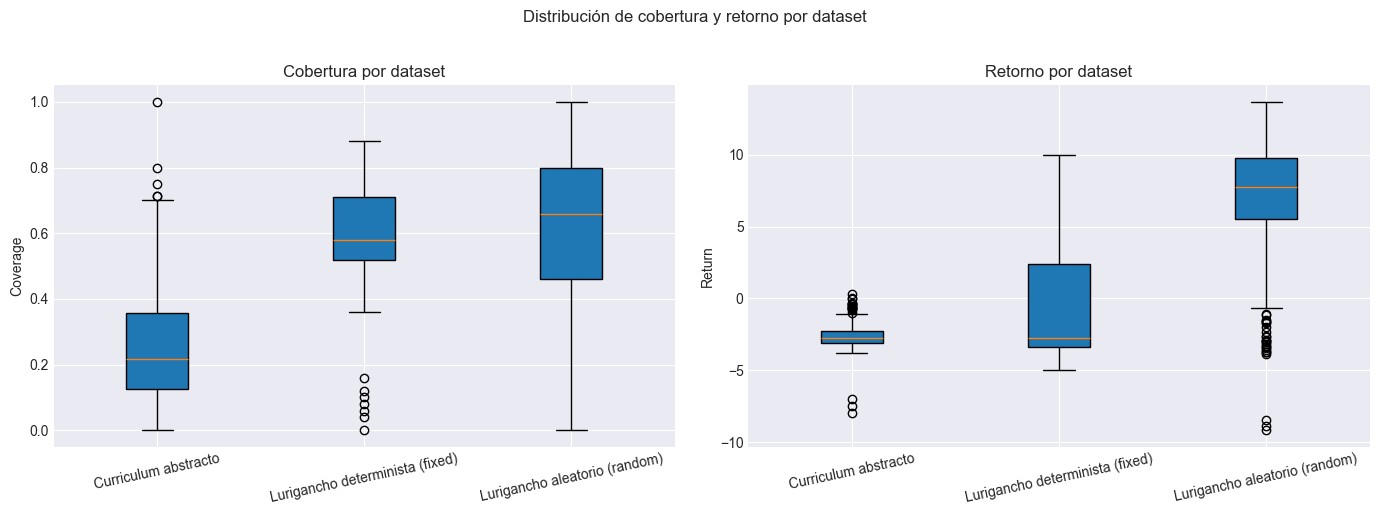

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
labels = [label for label, _ in LOG_SOURCES]

for ax, metric, title in zip(axes, ["coverage", "return"], ["Cobertura por dataset", "Retorno por dataset"]):
    grouped = [logs[label][metric] for label in labels]
    bp = ax.boxplot(grouped, labels=labels, vert=True, patch_artist=True)
    ax.set_title(title)
    ax.set_ylabel(metric.capitalize())
    ax.tick_params(axis="x", rotation=12)

fig.suptitle("Distribución de cobertura y retorno por dataset", y=1.02)
plt.tight_layout()
plt.show()


## Distribución de duración por episodio
Histogramas de `episode_seconds` para ver la variabilidad temporal en cada dataset.

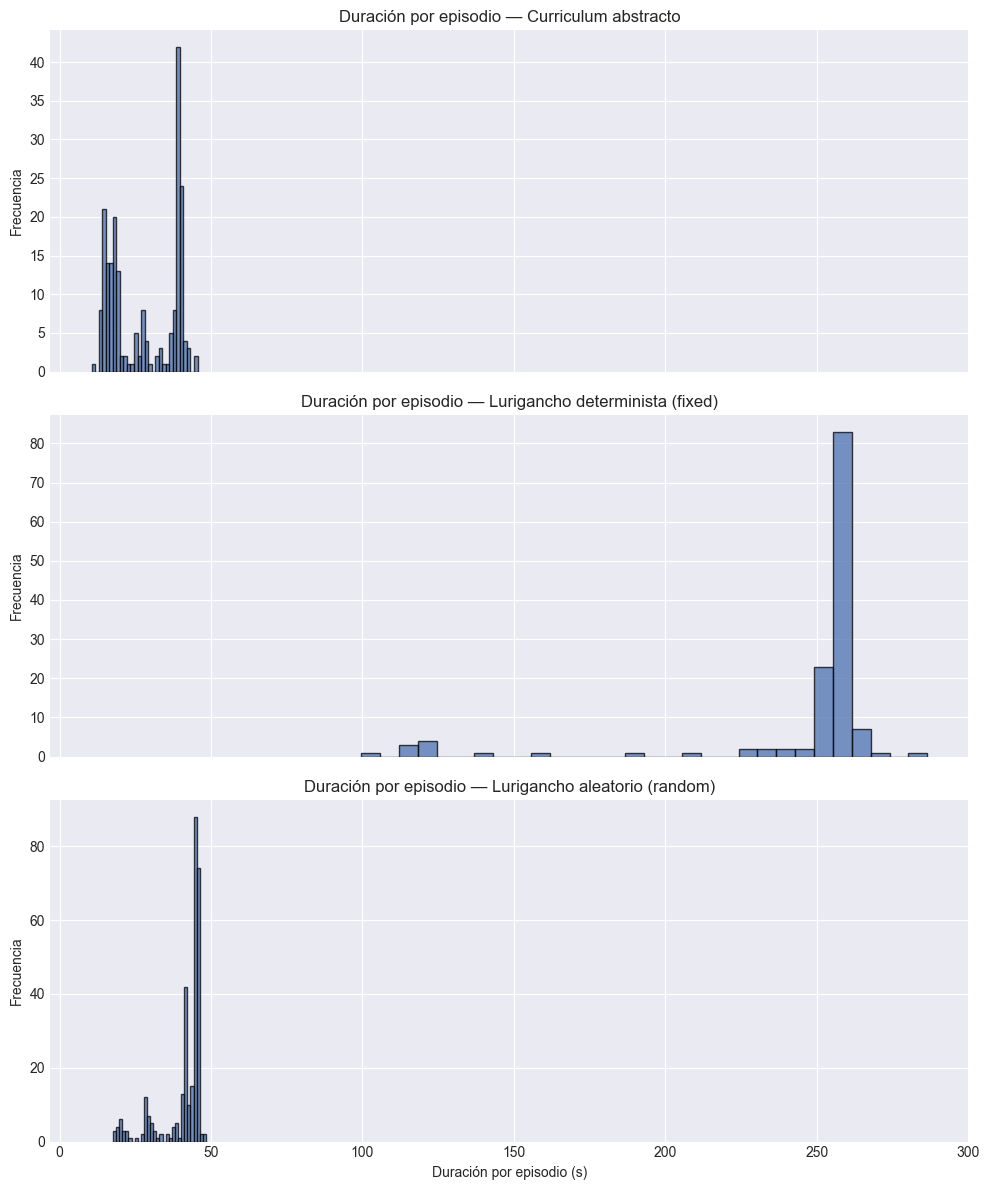

In [4]:
fig, axes = plt.subplots(len(LOG_SOURCES), 1, figsize=(10, 4 * len(LOG_SOURCES)), sharex=True)
if len(LOG_SOURCES) == 1:
    axes = [axes]

for ax, (label, _) in zip(axes, LOG_SOURCES):
    df = logs[label]
    ax.hist(df["episode_seconds"], bins=30, color="#4c72b0", alpha=0.75, edgecolor="black")
    ax.set_title(f"Duración por episodio — {label}")
    ax.set_ylabel("Frecuencia")

axes[-1].set_xlabel("Duración por episodio (s)")
plt.tight_layout()
plt.show()


## Duración vs. desempeño
Nubes de puntos que relacionan la duración de cada episodio con cobertura y retorno.

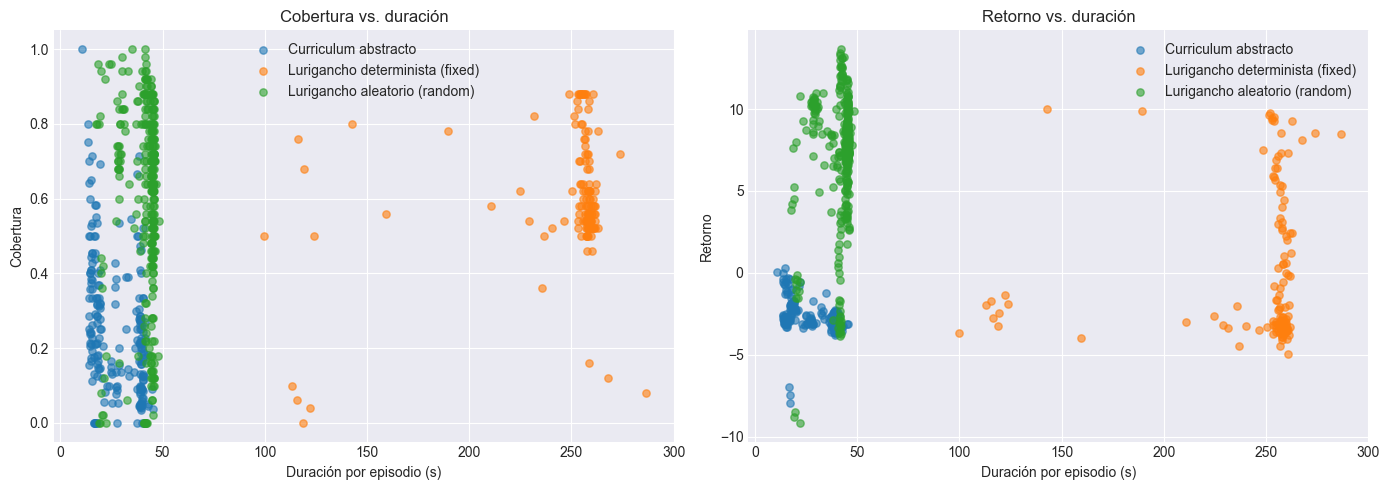

In [5]:
colors = plt.cm.tab10.colors
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (label, _) in enumerate(LOG_SOURCES):
    df = logs[label]
    axes[0].scatter(df["episode_seconds"], df["coverage"], label=label, alpha=0.6, s=28, color=colors[idx])
    axes[1].scatter(df["episode_seconds"], df["return"], label=label, alpha=0.6, s=28, color=colors[idx])

axes[0].set_title("Cobertura vs. duración")
axes[0].set_xlabel("Duración por episodio (s)")
axes[0].set_ylabel("Cobertura")

axes[1].set_title("Retorno vs. duración")
axes[1].set_xlabel("Duración por episodio (s)")
axes[1].set_ylabel("Retorno")

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()


## Correlación entre métricas
Mapa de calor con la correlación de Pearson entre métricas clave del entrenamiento.

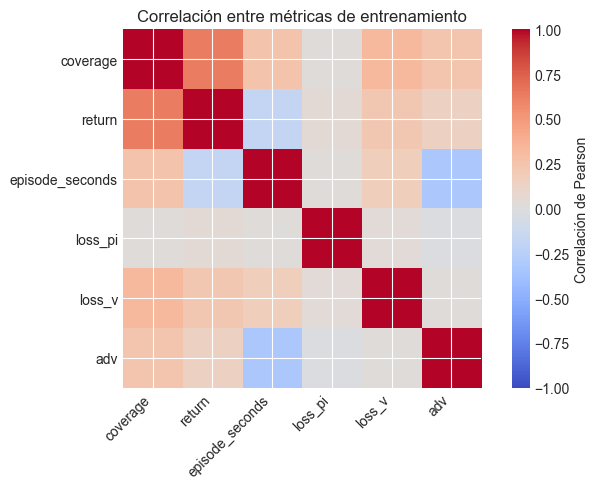

In [6]:
metrics = ["coverage", "return", "episode_seconds", "loss_pi", "loss_v", "adv"]
corr = combined[metrics].corr()

fig, ax = plt.subplots(figsize=(7, 5))
im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
ax.set_xticks(range(len(metrics)))
ax.set_xticklabels(metrics, rotation=45, ha="right")
ax.set_yticks(range(len(metrics)))
ax.set_yticklabels(metrics)
ax.set_title("Correlación entre métricas de entrenamiento")
fig.colorbar(im, ax=ax, label="Correlación de Pearson")
plt.tight_layout()
plt.show()
